# **Lab 1. Linear regression**

The idea behind this analysis is to predict the marks of the students by their efforts, quantified in overall duration and academic commitment. Through this lab, in which we are going to assess linear regression, we will be able to answer the following question:

- *"If we study for a certain number of hours per day, what will be our final mark?"*

## **1. Importing and plotting the dataset**
The first step of the pipeline involves the import and the exploration of the dataset. Firstly we import the libraries, giving them aliases.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Then we create a dataframe `df` by invoking the `read_csv()` function from `pandas` library, specifying the correct dataset.

In [3]:
# Import dataset
df = pd.read_csv("dataset.csv")

### **1.1. Dataset exploration**
Python allows us to intuitively visualize the structure of the dataframe using the `head()` function, which displays a snapshot of what's inside the dataset. The output of the `head()` function shows the first five rows of the dataset, along with the column names.

In [4]:
# Snapshot of the dataset
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


Another way to explore the dataset is by using the `shape` property, which displays the number of rows and columns of the dataframe.

In [5]:
# Shape of the dataset
df.shape

(100, 3)

### **1.2. Dataset understanding**
The features of our problem are:
- `number_courses` the number of courses a student is enrolled in;
- `time_study` the number of hours a student spends studying;

while the outcome is:
- `marks` the average mark scored by the student.

### **1.3. Checking null data**
Datasets often have inconsistencies, such as null values. We use the `isnull()` function combined with the `sum()` function to check for null values across all columns. This approach computes the number of null values for each column by summing accross the rows of the dataframe. Luckily enough, in this case we find no inconsistencies, as the sum of null values for all the features and the outcome is 0.

In [6]:
# Check null data
df.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

### **1.4. Summary statistics**
Let us also display summary statistics of the dataset such as mean, standard deviation, minimum and maximum for each column.

Mean provides a central tendency measure of the data. It gives a rough idea of the typical value in each column.

In [7]:
df.mean()

number_courses     5.29000
time_study         4.07714
Marks             24.41769
dtype: float64

Standard deviation measures the amount of variation or dispersion around the mean. It is useful to understand how spread out the values are from the average. A high standard deviation suggests more variability, while a low standard deviation implies values are closer to the mean.

In [8]:
df.std()

number_courses     1.799523
time_study         2.372914
Marks             14.326199
dtype: float64

Minimum and maximum values of the dataset provide a quick glance at the spread of values. For instance, a wide range may suggest variability (extreme values that significantly differ from the mean can be identified as outliers), while a narrow range might indicate consistency.

In [9]:
df.min()

number_courses    3.000
time_study        0.096
Marks             5.609
dtype: float64

In [10]:
df.max()

number_courses     8.000
time_study         7.957
Marks             55.299
dtype: float64

### **1.5. Correlation visualization**
We can now perform some preliminary data visualization experiments to understand whether there is a correlation between a certain feature and the outcome. Firstly, we evaluate the scatter plot between the `number_courses` feature (on the x-axis) and the `marks` outcome we want to predict (on the y-axis). The relationship we observe appears to be non-linear, and so uncompatible with a linear regression approach.

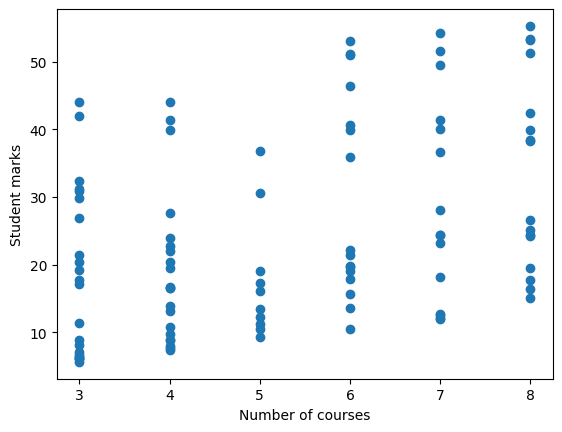

In [11]:
# Scatter plot between number_courses and Marks
plt.scatter(x = df.number_courses, y = df.Marks)
plt.xlabel("Number of courses")
plt.ylabel("Student marks")
plt.show()

In the same way we examine the correlation between the `time_study` feature and the `Marks` outcome we want to predict. We observe that there is a significant correlation between the second feature and the outcome. For this reason, we will proceed with a linear regression.


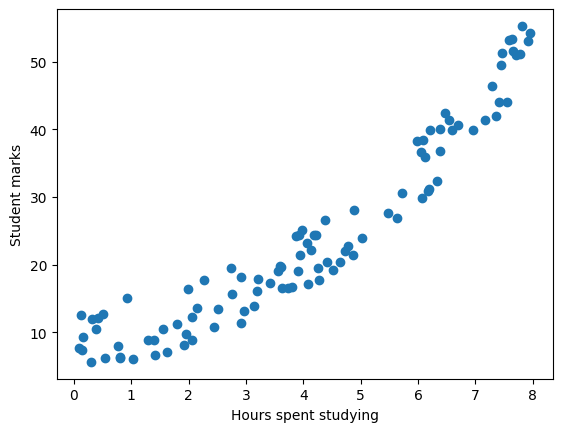

In [12]:
# Scatter plot between time_study and Marks
plt.scatter(x = df.time_study, y = df.Marks)
plt.xlabel("Hours spent studying")
plt.ylabel("Student marks")
plt.show()

## **2. Splitting data**
Once the dataset has been explored and well-understood, we need to split our data.

### **2.1. Training and testing**
In our pipeline, there is a training phase during which we build our model and a test phase to test if the trained model performs well on completely independent examples, different from the ones used during training. This independent test helps us evaluate the model's generalization error, which can be decomposed into bias and variance.
- Bias reflects underfitting, where the model fails to capture patterns, resulting in poor performance during training.
- Variance reflects overfitting, where the model fits too well on the training set but performs poorly on unseen data.

To assess these aspects of generalization, we need two separate datasets: one for training the model and one for testing it.

For this reason, we split the original dataframe `df` in two new dataframes `df_train` and `df_test`. We decide the percentage `s_f` of the total examples to include in the training set so that the remaining goes into the test set. Typically, a common split is 80% for training and 20% for test, but this can vary depending on the dataset size and model requirements (70% for training and 30$ for test is also commonly used).

In [13]:
import math

# Percentage of split
s_f = 0.8

### **2.2. Choosing the split percentage**
Since we have 100 examples, our split will result in 80 examples for the training set and 20 examples for the test set. Using the `shape[0]` property we retrieve only the number of rows (examples) of the dataset. In whis way, we can determine the number of rows to allocate to the training set by multiplying the total number of rows by the fraction `s_f` (and consequently the number of rows to allocate to the test set).

The use of `floor()` and `ceil()` functions from the `math` library is crucial to prevent fractional values.

In [14]:
# Number of training examples
n_train = math.floor(s_f * df.shape[0])

# Number of test examples
n_test = math.ceil((1 - s_f) * df.shape[0])

print(n_train, n_test)

80 20


### **2.3. Training and test set**
We can now split the original `df` dataframe into two new dataframes: `df_train` for training and `df_test` for testing.

In [15]:
# Training set
df_train = df[:n_train]

# Test set
df_test = df[n_train:]


To ensure that our dataset has been split correctly, we can use again the `head()` method to inspect the first few rows of `df_train`.

In [16]:
df_train.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


## **3. Model implementation**
We need to fit the linear regression parameters $\theta$ to the dataset using gradient descent.

### **3.1. Update equations**
The hypotesis function of linear regression is:

$$h_\theta(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

The objective of linear regression is to minimize the cost function, which is the Root Mean Squared Error (RMSE):

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left(h_\theta(x^{(i)}) - y^{(i)}\right)^2 $$

To minimize the cost of $J(\theta)$ we will use batch gradient descent algorithm. In batch gradient descent, each iteration performs the update:

$$\theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^{m}\left(h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}  $$

which simultaneously updates $\theta_j$ for all $j$. With each step of gradient descent, the parameters $\theta_j$ come closer and closer to the optimal values that will achieve the lowest cost of the cost function $J(\theta)$.

### **3.2. Preparing data**
To perform linear regression, we need to include an intercept term $\theta_0$ which helps our model to better fit data. This term isn't directly present in the data, but it needs to be added. By adding the intercept term as an extra feature, often called a *dummy feature*, we can treat it the same way as other features in the regression model. This trick makes the math behind the regression simpler and more consistent.

For our purposes, we need to specify the size `m` of the training set. Then we build the design matrix `X` by stacking the vector of the dummy feature to the vector of the `time_study` feature from the training set (this is very important, otherwise we would make a mistake).

A common choice is to set the intercept terms to one (if needed, they will be updated during gradient descent).

In the same way we build the outcome vector `y` and finally we initialize the parameters vector `theta` to zero. The `reshape(-1,1)` function is used to ensure that all the previous vectors are treated as column vectors, in order to mantain compability between shapes.

In [17]:
# Number of training examples
m = df_train.shape[0]

# Design matrix
X = np.hstack((np.ones((m,1)), df_train.time_study.values.reshape(-1,1)))

# Outcome vector
y = np.array(df_train.Marks.values).reshape(-1,1)

# Parameters vector
theta = np.zeros(shape = (X.shape[1],1))

Finally we define the learning rate `alpha` and the maximum number of iterations as a stopping condition .

In [18]:
# Learning rate
alpha = 0.01

# Maximum number of iterations
iterations = 1500

### **3.3. Computing the cost**
Let's define the function `compute_cost()` to compute the cost (previously defined as the RMSE). This function will take as an input the desing matrix `X`, the outcome vector `y`, and the vector of regression parameters `theta`. It will then:
1. extract the necessary information from the inputs;
2. build the hypothesis function;
3. explicitly compute the cost function.

In [19]:
def compute_cost(X, y, theta):
    # Number of training examples
    m = y.shape[0]

    # Hypothesis function
    h = X.dot(theta)

    # Cost function
    J = (1/(2*m)) * (np.sum((h-y)**2))
    
    return J

For example, we can compute the cost when the linear regression parameters are equal to zero.

In [20]:
J = compute_cost(X, y, theta)
print('Cost computed:',J)

Cost computed: 394.06237603125004


### **3.4. Gradient descent implementation**

Gradient descent is a generic optimization algorithm that measures the local gradient of the cost function with regards to the parameter $\theta$ and goes in the direction of descending gradient. Until convergence, the following rule is repeated:

$$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j} J(\theta_0,\theta_1) = \theta_j - \alpha\frac{1}{m} \sum_{i=1}^{m} \left(h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} $$

where $j=0,1$ and $\alpha$ is the learning rate. It is important to state that:
- if the learning rate is too small, the gradient descent will be slow, and so will be the convergence;
- if the learning rate is too large, the gradient descent can overshoot the minimum and may fail to converge.

We define the function `gradient_descent()` to implement the update rule. This function will take as an input the design matrix `X`, the outcome vector `y`, the vector of regression parameters `theta`, the learning rate `theta` and the maximum number of iterations `num_iters`.

Again, we extract the number of samples `m`. Then we define a vector `J_history` to keep track of the history of the values of the cost function.

Until convergence, we compute the hypothesis function and then we update the regression parameters.

In [21]:
def gradient_descent(X, y, theta, alpha, num_iters):

    # Number of samples
    m = y.shape[0]

    # Cost initialization
    J_history = np.zeros(shape=(num_iters,1))

    for i in range(0, num_iters):
        # Hypothesis function
        h = X.dot(theta)

        # Update term
        delta = (1/m) * ((h - y).T.dot(X))

        # Parameters update
        theta = theta - (alpha * delta.T)

        # Cost history
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

## **4. Model application**
We can finally apply the linear regression model to our data. Firstly, we run the `gradient_descent()` function to update the regression parameters `theta`. We use `, _` because at the moment it is not useful to keep track of the history of the cost function.

In [22]:
# Gradient descent
theta, _= gradient_descent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent:\n',theta)

Theta found by gradient descent:
 [[0.80378559]
 [5.72523344]]


### **4.1. Visualizing results**
We can use the parameters found by gradient descent to plot a regression line over the previous scatter plot to visually assess how well our linear regression model fits the training data. This comparison provides a clear representation of how the predicted values compare to the actual data points and helps in validating the effectiveness of our model.

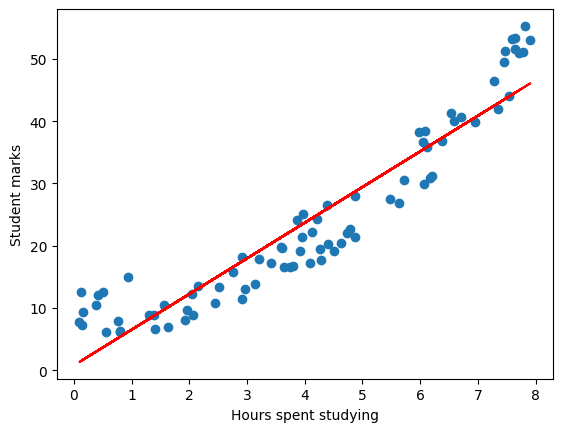

In [23]:
# Comparison between ground truth and the predictions
plt.scatter(x = df_train.time_study , y = df_train.Marks)
plt.plot(X[:,1], X.dot(theta), color='r')
plt.xlabel("Hours spent studying")
plt.ylabel("Student marks")
plt.show()

## **5. Model debugging**
Tipically, debugging is done at the software level to identify and resolve errors in code. However, when we discuss debugging at the model level, we focus on analyzing and understanding the behaviour of the linear regression model itself.


### **5.1. Visualizing cost function**
The cost function $J(\theta)$ is bowl.shaped and has a global minimum. This minimum is the optimal point for $\theta_0$ and $\theta_1$, and each step of gradient descent moves closer to this point. To gain insight into how $\theta_0$ and $\theta_1$ change throughout the gradient descent process, we can initialie them simultaneously. Let us consider a grid of values, for example 100 different values for $\theta_0$ and 100 different values for $\theta_1$.

As we invoke the gradient descent function, it iteratively updates $\theta_0$ and $\theta_1$ towards minimizing the cost function. By tracking the changes in $\theta_0$ and $\theta_1$ accross our grid of initial values, we can visualize how these parameters evolve with each iteration of gradient descent.

In [24]:
# Grid of parameters
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 8, 100)

# Cost evolution
J_vals = np.zeros(shape=(len(theta0_vals), len(theta1_vals)))
for i in range(0, len(theta0_vals)):
    for j in range(0, len(theta1_vals)):
        J_vals[i,j] = compute_cost(X, y, [[theta0_vals[i]], [theta1_vals[j]]])

### **5.2. Contour plots**
Once we obtained different costs for each combination of $\theta_0$ and $\theta_1$ we can plot a contour plot, where the contours represent different values of the cost function $J(\theta)$ and marks the optimal parameters $\theta_0$ and $\theta_1$ with a red marker. This visualization helps in understanding how the cost function varies with different model parameters and confirms the location of the minimum cost.

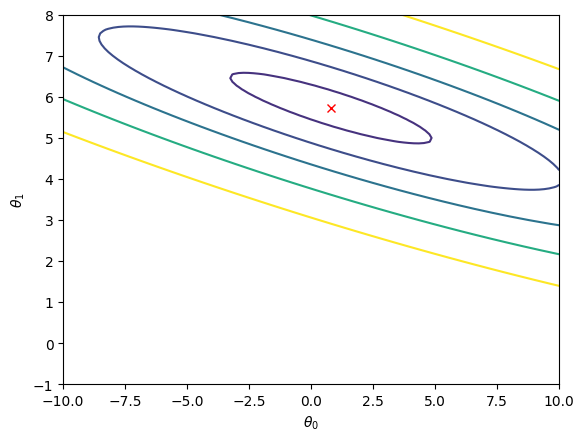

In [25]:
# Contour plot
ax = plt.contour(theta0_vals, theta1_vals, np.transpose(J_vals), levels=np.logspace(-2,2,20))
plt.plot(theta[0,0], theta[1,0], marker='x', color='r');
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'$\theta_1$');

## **6. Model testing**
After training our linear regression model on the training set, the next step is to evaluate how well it generalizes to unseen data using the test set. This helps us understand if our model can make accurate predictions on new, independent data.

### **6.1. Preparing data**
Similarly to the training phase we build the design matrix `X_test` and the outcome vector `y_test`. Then we compute the predictions vector `y_pred` and the dot product between the design matrix, containing test samples, and the parameters vector found by gradient descent during the training phase. In other words, we do not update again the model (this is considered as a huge mistake). We simply make it work on the test set. This allows us to understand how well the model generalizes on unseen data.

In [26]:
# Number of test samples
m_test = df_test.shape[0]

# Design matrix
X_test = np.hstack((np.ones((m_test,1)), df_test.time_study.values.reshape(-1,1)))

# Outcome vector
y_test = np.array(df_test.Marks.values).reshape(-1,1)

# Prediction vector
y_pred = X_test.dot(theta)

### **6.2. Visualizing results**
Now we can plot a scatter plot to assess wheter there is a linear relationship between ground truth and the predictions of our model.

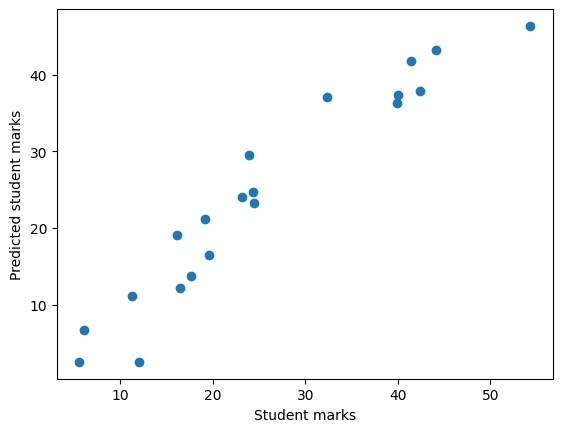

In [27]:
plt.scatter(x = df_test.Marks, y=y_pred)
plt.xlabel("Student marks")
plt.ylabel("Predicted student marks")
plt.show()

### **6.3. Performance metrics**
As we can see, there is an important relationship between the true values and the predicted values. To evaluate the generalization error, we can define some metrics based on the difference between the outcomes and the predictions.

The Mean Absolute Error (MAE) measures the average magnitude of the errors between predicted values and actual values. It gives a straightforward idea of prediction accuracy by averaging the absolute differences.

$$\operatorname{MAE} = \frac{1}{m}\sum_{i=1}^{m} \left\lvert \hat{y}^{(i)} - y^{(i)}\right\rvert$$

The Mean Squared Error (MSE) measures the average of the squares of the errors between predicted and actual values. It penalizes larger errors more than smaller ones due to squaring, making it sensitive to outliers.

$$\operatorname{MSE} = \frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$$

The Root Mean Squared Error (RMSE) is the square root of the MSE. It provides a measure of the average magnitude of the errors, just like MAE, but incorporates the squaring from MSE to penalize larger errors.

$$\operatorname{RMSE} = \sqrt{\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2}$$

The R-Squared, also known as coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It measures how well the model fits the data.

$$ R^2 = 1 - \frac{\displaystyle\sum_{i=1}^{m}\left(\hat{y}^{(i)} - y^{(i)}\right)^2}{\displaystyle\sum_{i=1}^{m}\left(\hat{y}^{(i)} - \overline{y}\right)^2}

In [28]:
# Error
d = y_test - y_pred

# Mean Absolute Error
mae_f = np.mean(abs(d))

# Mean Squared Error
mse_f = np.mean(d**2)

# Root Mean Squared Error
rmse_f = np.sqrt(mse_f)

# R-Squared
r2_f = 1 - (sum(d**2)/sum((y-np.mean(y))**2))

print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

MAE: 3.140684322280169
MSE: 15.967086712567362
RMSE: 3.9958837211019245
R-Squared: [0.98078305]


### **6.4. Understanding results**
As we can see, the Mean Absolute Error tells us that the model's predictions are, on average, off by 3 units. In a range from 5 to 55, with a mean value of 24, the MAE suggests reasonably close predictions.

The R-Squared instead tells us that the 98% of the variance of the dependent variable `y_test` is captured and explained by the predictions of the model `y_pred`. Considering that R-Squared spans from 0% to 100%, its value proves that there is a strong linear relationship.

## **7. Model generalization**

Until now, we have considered only the `time_study` variable. To take in account also the `number_courses` variable to predict the final marks, we have to add some additional steps in our pipeline in order to address the multivariate regression task.

### **7.1. Feature normalization**
Different features might have different scales. To ensure the features in the design matrix are on the same scale and thus comparable, we will normalize them using $z$-score normalization. This technique adjusts each feature to have a mean of 0 and a standard deviation of 1:

$$ x_j^{(i)} = \frac{x_j^{(i)} - \mu_j}{\sigma_j} $$

We define the function `feature_normalize()` to implement the normalization. This function will take as an input the design matrix `X`, the means and the standard deviations for each column of the design matrix. By the way, `mean`and `std` are parameters are optional because, if they have only one dimension (for this purpose we will use the `shape` property), the function will compute them from the design matrix `X`.

Note that in the `std()` function from `numpy` we specify the field `ddof=1` to get the sample standard deviation, which is more suitable for small datasets.

In [29]:
def feature_normalize(X, mean=np.zeros(1), std=np.zeros(1)):

    # Design matrix
    X = np.array(X)

    # Compute mean and standard deviation
    if len(mean.shape) == 1 or len(std.shape) == 1:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0, ddof=1)
    
    # Perform normalization
    X = (X - mean)/std
    
    return X, mean, std

Now we can use the `feature_normalize()` function to normalize our data. In particular, we define another dataframe `df2` in which we will substitute the columns `number_courses` and `time_study` with their normalized values contained in the normalized design matrix `X_norm`.

In [30]:
# Normalization
X_norm, mu, sigma = feature_normalize(df[['time_study', 'number_courses']])

# Second dataframe
df2 = df

# Normalized features
df2['time_study'] = X_norm[:,0]
df2['number_courses'] = X_norm[:,1]

Agaim, to ensure that our dataset has been normalized correctly, we can use again the `head()` method to inspect the first few rows of `df2`.

In [31]:
df2.head()

,number_courses,time_study,Marks
0,-1.272559,0.181574,19.202
1,-0.716857,-1.677743,7.734
2,-0.716857,-0.397882,13.811
3,0.394549,1.614833,53.018
4,1.505955,1.573534,55.299


### **7.2. Splitting data**
Just like in the previous case, we split our data into two sets: the training set (80% of the data) and the test set (20% of the data). The first set will allow us to train the model and find the optimal regression parameters, the second one will help us assess the generalization capabilities of the model on unseen data.

In [32]:
# Training set
df2_train = df2[:n_train]

# Test set
df2_test = df2[n_train:]

To ensure that our dataset has been split correctly, we can use again the `head()` method to inspect the first few rows of `df2_train`.

In [33]:
df2_train.head()

,number_courses,time_study,Marks
0,-1.272559,0.181574,19.202
1,-0.716857,-1.677743,7.734
2,-0.716857,-0.397882,13.811
3,0.394549,1.614833,53.018
4,1.505955,1.573534,55.299


### **7.3. Gradient descent**
The main difference from the univariate regression problem is that now there is one more feature in the matrix `X`. The hypothesis function and the batch gradient descent update rule remain unchanged. In the multivariate case, the cost function can also be written in the following vectorized form:

$$J(\theta) = \frac{1}{2m}(X\theta-y)^T(X\theta-y)$$

First, we update the `compute_cost()` function with the new expression of the cost function.

In [34]:
def compute_cost(X, y, theta):

    # Number of samples
    m = y.shape[0]

    # Hypothesis function
    h = X.dot(theta)

    # Cost function
    J = (1/(2*m)) * ((h-y).T.dot(h-y))
    
    return J

Then we consider again the `gradient_descent()` function.

In [35]:
def gradient_descent(X, y, theta, alpha, num_iters):

    # Number of samples
    m = y.shape[0]

    # Cost initialization
    J_history = np.zeros(shape=(num_iters,1))

    for i in range(0, num_iters):
        # Hypothesis function
        h = X.dot(theta)

        # Update term
        delta = (1/m) * ((h - y).T.dot(X))

        # Parameters update
        theta = theta - (alpha * delta.T)

        # Cost history
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

We prepare again our data by including the intercept term and by ensuring that all the dimensions are compatible.

In [36]:
# Number of training examples
m = df2_train.shape[0]

# Design matrix
X = np.hstack((np.ones((m,1)), df2_train.time_study.values.reshape(-1,1), df2_train.number_courses.values.reshape(-1,1)))

# Outcome vector
y = np.array(df_train.Marks.values).reshape(-1,1)

# Parameters vector
theta = np.zeros(shape = (X.shape[1],1))

Finally we define the learning rate `alpha` and the maximum number of iterations as a stopping condition .

In [37]:
# Learning rate
alpha = 0.01

# Maximum number of iterations
iterations = 1500

### **7.5. Model application**
We can finally apply the multivariate regression model to our data. Firstly, we run the `gradient_descent()` function to update the regression parameters `theta`. We use `, _` because at the moment it is not useful to keep track of the history of the cost function.

In [38]:
# Gradient descent
theta, _= gradient_descent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent:\n',theta)

Theta found by gradient descent:
 [[24.51543724]
 [12.65731852]
 [ 3.79504224]]


### **7.6. Model testing**
It's now time to test our multivariate regression model, in the exact same way as we did before with the univariate regression model.

In [39]:
# Number of test samples
m_test=df2_test.shape[0]

# Design matrix
X_test = np.hstack((np.ones((m_test,1)), df2_test.time_study.values.reshape(-1,1),df2_test.number_courses.values.reshape(-1,1)))

# Outcome vector
y_test = np.array(df2_test.Marks.values).reshape(-1,1)

# Prediction vector
y_pred = X_test.dot(theta)

Now we can plot a scatter plot to assess wheter there is a linear relationship between ground truth and the predictions of our model.

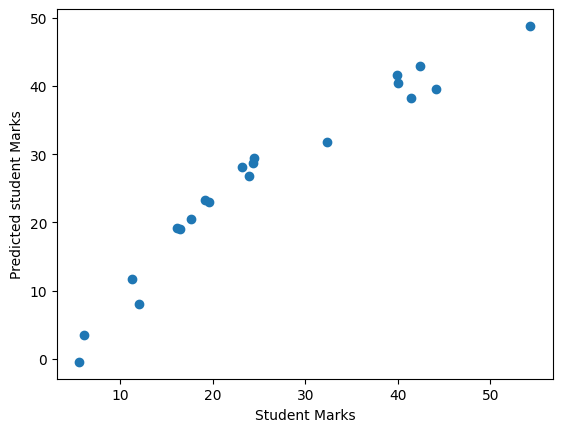

In [40]:
plt.scatter(x = df2_test.Marks , y=y_pred)
plt.xlabel("Student Marks")
plt.ylabel("Predicted student Marks")
plt.show()

### **7.7. Performance metrics**
As we can see, there is an important relationship between the true values and the predicted values. We evaluate again the generalization error.

In [41]:
# Error
d = y_test - y_pred

# Mean Absolute Error
mae_f = np.mean(abs(d))

# Mean Squared Error
mse_f = np.mean(d**2)

# Root Mean Squared Error
rmse_f = np.sqrt(mse_f)

# R-Squared
r2_f = 1 - (sum(d**2)/sum((y-np.mean(y))**2))

print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

MAE: 3.140894013672116
MSE: 12.674585786741593
RMSE: 3.560138450501833
R-Squared: [0.98474569]


The introduction of the `number_courses` feature does not improve the performances of the model. Performance metrics are more or less the same, proving that there is no need to consider a more complex model because its complexity is useless and requires a higher computational effort.

## **8. Tuning parameters**
We have previously considered a learning rate of $\alpha=0.01$. But is it the right value? To understand which value of the learning rate fits the most our model, we consider the last step of our pipeline which involves the tuning of the parameters. Again, we prepare our data:


In [42]:
# Number of training examples
m = df2_train.shape[0]

# Design matrix
X = np.hstack((np.ones((m,1)), df2_train.time_study.values.reshape(-1,1), df2_train.number_courses.values.reshape(-1,1)))

# Outcome vector
y = np.array(df_train.Marks.values).reshape(-1,1)

# Parameters vector
theta = np.zeros(shape = (X.shape[1],1))

### **8.1. Choosing the right learning rate** 
Then we define a vector of possible values of the learning rate which we will be testing.

In [43]:
# Learning rates
alpha = [0.4, 0.1, 0.05, 0.01]

# Maximum number of iterations
num_iters = 50

We run the gradient descent algorithm for each value of the learning rate to understand which value is more suitable for our purposes.

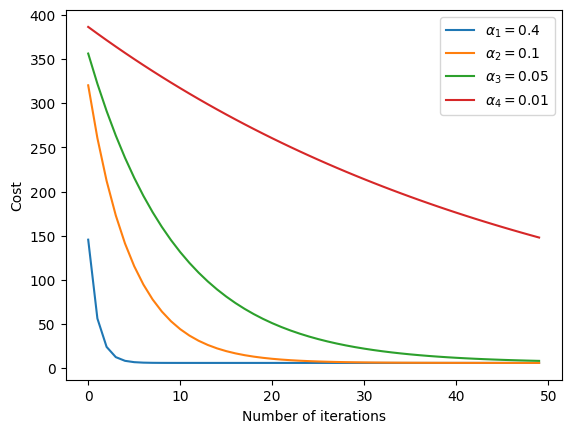

In [44]:
for i in range(0, len(alpha)):

    # Parameters vector
    theta = np.zeros(shape=(X.shape[1],1))

    # Gradient descent
    theta, J_history = gradient_descent(X, y, theta, alpha[i], num_iters)

    # Comparison between cost functions
    plt.plot(range(len(J_history)), J_history, label=fr'$\alpha_{i+1} = {alpha[i]}$')

plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()



### **8.2. Understanding results**
As we can see, different values of the learning rate provide different shapes of the cost function. The learning rate $\alpha_4=0.01$ we have previously used is actually not a good choice, because the cost function reaches its minimum very slowly. In the same way, $\alpha_1 = 0.4$ is not a good choice because the cost function reaches its minimum very fastly, leading to overshoots. A balanced choice can be $\alpha_2 = 0.1$.

## **9. Applying model on real data**
It's finally time to answer our questions. First thing first, we change the learning rate to the optimal value we found during the tuning phase.

In [45]:
# Learning rate
alpha = 0.1

Then we run again gradient descent to update the regression parameters because we changed the value of the learning rate.

In [46]:
# Gradient descent
theta, _= gradient_descent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent:\n',theta)

Theta found by gradient descent:
 [[24.51545035]
 [12.65730747]
 [ 3.79505975]]


Then we normalize our data with the previously-obtained parameters during the z-score (this is crucial in order to make things work)

In [47]:
# Normalizing data
my_time = (7.5 - mu[0])/sigma[0]
my_courses = (4 - mu[1])/sigma[1]

Finally we can predict what will be our final mark if we enroll in 4 courses and study for 7.5 hours:

In [53]:
# Prediction
y_pred = theta[0] + theta[1]*my_time + theta[2]*my_courses
print('You will get a final mark of:', y_pred[0])

You will get a final mark of: 40.05273633809438
